In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

In [3]:
#Clean data
e_data = pd.read_csv("https://www.dropbox.com/s/ey2y94hyfclgl98/clean_data.csv?dl=1")

In [4]:
print (e_data)

       Unnamed: 0  Latitude  Longitude   Depth  Magnitude  Month   Day  \
0               0   19.2460   145.6160  131.60        6.0      1   2.0   
1              39   53.0080  -162.0080   17.80        6.4      2   6.0   
2              44   53.1910  -161.8590   22.50        6.3      2   6.0   
3              57   21.5270   143.0810  340.00        5.6      2  17.0   
4              86   53.2920  -162.3310   20.00        5.7      3  13.0   
...           ...       ...        ...     ...        ...    ...   ...   
18720       23325    6.1142   -82.5906   10.00        5.6     11  12.0   
18721       23359  -35.2021    54.0219   10.00        5.5     12   1.0   
18722       23365   11.0316   -60.9005   31.75        5.9     12   6.0   
18723       23397  -10.1785   160.9149   10.00        6.0     12  20.0   
18724       23398  -10.1549   160.7816   10.38        5.5     12  20.0   

         Year    Country Name  Density  Population  
0      1965.0   United States       21   194303000  
1    

In [15]:
cols = ['Latitude', 'Longitude']
#rows = ['Country Name']

x = e_data[cols]
#y = e_data[rows]
y = e_data['Country Name']
print (x.head())
print (y.head())

   Latitude  Longitude
0    19.246    145.616
1    53.008   -162.008
2    53.191   -161.859
3    21.527    143.081
4    53.292   -162.331
0    United States
1    United States
2    United States
3    United States
4    United States
Name: Country Name, dtype: object


In [6]:
import math
def euclideanDistance(instance1, instance2):
    distance = 0
    for x in range(len(instance1)):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

In [7]:
import operator
def getNeighbors(trainingSet, instance, k):
    """Return the first k locations of the nearest neighbours to an instance"""
    distances = []
    for x in range(len(trainingSet)):
        dist = euclideanDistance(instance, trainingSet[x])
        distances.append(dist)
    locs = np.argsort(distances)
    return locs[:k]

In [29]:
testInstance = x.loc[y == 'Ireland']
display(testInstance)

,Latitude,Longitude
1050,27.793,60.043
6047,11.758,-61.389


In [30]:
neighbors = getNeighbors(x.values, testInstance.values[0], 10)
print(y[neighbors])

1050         Ireland
16191          India
16726          India
13047          India
13045          India
13061    Afghanistan
11491    Afghanistan
11492    Afghanistan
10461    Afghanistan
1916        Pakistan
Name: Country Name, dtype: object


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
print(knn.score(x_test, y_test))

0.9169559412550067


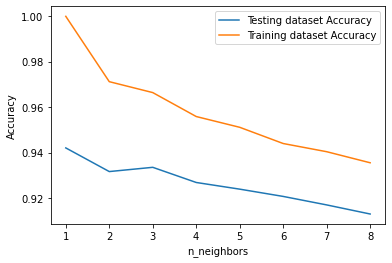

In [31]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)
    
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()
